### Problem Description

In this report we will examine the LU decomposition and Gaussian elimination without pivoting methods for solving a system Ax - b. Specifically we will examine the time to compute and the residual error and matrices of different sizes using each method and record these values. We will create a plot of the time to compute and and table of the residual errors.

### Results

See 'Wallclock Time and Errors' section below.

### Guasian Elimination Without Pivoting

In [119]:
import numpy as np
import sys

def gaussian_elimination(A):
    n = len(A)

    for i in range(n):
        # partial pivoting
        max_row = i
        for j in range(i+1, n):
            if abs(A[j][i]) > abs(A[max_row][i]):
                max_row = j
        A[i], A[max_row] = A[max_row], A[i]

        # elimination
        if A[i][i] == 0:
            continue
        
        for j in range(i+1, n):
            multiplier = A[j][i] / A[i][i]
            for k in range(i+1, n):
                A[j][k] -= multiplier * A[i][k]
            A[j][i] = 0

    return A

A = [[2, 4, 5], [7, 6, 5], [9, 11, 3]]

result = gaussian_elimination(A)

print('rref(A) = ', result)

rref(A) =  [[9, 11, 3], [0, -2.5555555555555554, 2.6666666666666665], [0, 0, 5.956521739130435]]


### Back Substitution

In [120]:
import time

def back_sub(U, b):
    n = len(b)
    x = [0] * n
    
    for i in range(n-1, -1, -1):
        x[i] = b[i]
        for j in range(i+1, n):
            x[i] -= U[i][j] * x[j]
        x[i] /= U[i][i]
            
    return x

b = [3, 2, 1]

t0 = time.time() 

x_back = back_sub(result, b)

t1 = time.time()
total_time = t1 - t0

# define norm
def compute_norm(A, x, b):
    Ax = np.dot(A, x)
    norm = np.linalg.norm(Ax - b, ord=2)
    return norm

norm = compute_norm(A, x_back, b)

print('x = ', x_back)
print("Residual Error: ", norm)
print('Time to Compute: ', total_time)

x =  [1.0197820797630384, -0.6074262139003492, 0.16788321167883213]
Residual Error:  4.440892098500626e-16
Time to Compute:  0.0


### LU Factorization

In [123]:
import numpy as np

def lu_factorization(A):
    n = len(A)
    L = [[0.0] * n for i in range(n)]
    U = [[0.0] * n for i in range(n)]

    # copy values of A into U
    for i in range(n):
        for j in range(n):
            U[i][j] = A[i][j]

    # perform the LU factorization
    for k in range(n):
        # compute diagonal elements of L and U
        L[k][k] = 1.0
        for i in range(k+1, n):
            factor = U[i][k] / U[k][k]
            L[i][k] = factor
            U[i][k] = 0.0
            for j in range(k+1, n):
                U[i][j] = U[i][j] - factor * U[k][j]

    return L, U


A = [[2, 4, 5], [7, 6, 5], [9, 11, 3]]

L, U = lu_factorization(A)

print("L = ", L)
print("U = ", U)

L =  [[1.0, 0.0, 0.0], [3.5, 1.0, 0.0], [4.5, 0.875, 1.0]]
U =  [[2, 4, 5], [0.0, -8.0, -12.5], [0.0, 0.0, -8.5625]]


### Solve LUx = b via Forward and Backwards Substitution

In [104]:
def forward_substitution(L, b):
    n = len(L)
    y = [0] * n
    y[0] = b[0] / L[0][0]

    for i in range(1, n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i][j] * y[j] 
        y[i] = y[i] / L[i][i] 

    return y

def solve_lu(L, U, b):
    # forward substitution: solve Ly = Pb
    y = forward_substitution(L, b)
    
    # backward substitution: solve Ux = y
    x = back_sub(U, y)
    
    return x

b = [3, 2, 1]

t0 = time.time()

x = solve_lu(L, U, b)

t1 = time.time()
total_time = t1 - t0

norm = compute_norm(A, x, b)

print("x = ", x)
print('Residual Error: ', norm)
print('Time to Compute: ', total_time)

x =  [-0.25547445255474455, 0.13868613138686126, 0.5912408759124088]
Residual Error:  4.965068306494546e-16
Time to Compute:  0.0


### Define a (n × n) matrix A = (5√n)I + R

In [108]:
import numpy as np

# set the value of n
n = 50

# generate matrix A
A = 5 * np.sqrt(n) * np.eye(n) + np.random.normal(size = (n, n))

b = np.random.normal(0, 1, size=(n, 1))

### Solve Using n = 50

In [110]:
import numpy as np

# set the value of n
n = 50

# generate matrix A
A = 5 * np.sqrt(n) * np.eye(n) + np.random.normal(size = (n, n))

b = np.random.normal(0, 1, size=(n, 1))



# LU Factorization

L, U = lu_factorization(A)

t0 = time.time()

x = solve_lu(L, U, b)

t1 = time.time()
total_time1a = t1 - t0

# MUST CHANGE A TO SAME TYPE AS PREVIOUS EXAMPLES!

residual1a = np.linalg.norm(np.dot(A, x) - b)

print('Time to Compute Using n = ', n, 'with LU: ', total_time1a)
print("Residual error: ", residual1a)


# GE Factorization

result = gaussian_elimination(A)

t2 = time.time()

x_back = back_sub(result, b)

t3 = time.time()
total_time1b = t3 - t2

residual1b = np.linalg.norm(np.dot(A, x) - b)

print('Time to Compute Using n = ', n, 'with GE: ', total_time1b)
print("Residual error: ", residual1b)

Time to Compute Using n =  50 with LU:  0.016570568084716797
Residual error:  0.6312783040038418
Time to Compute Using n =  50 with GE:  0.010084390640258789
Residual error:  6.42099832184827


### Solving Using Size n = 100

In [111]:
import numpy as np

n = 100

A = 5 * np.sqrt(n) * np.eye(n) + np.random.normal(size = (n, n))

b = np.random.normal(0, 1, size=(n, 1))



L, U = lu_factorization(A)

t0 = time.time()

x = solve_lu(L, U, b)

t1 = time.time()
total_time2a = t1 - t0

residual2a = np.linalg.norm(np.dot(A, x) - b)

print('Time to Compute Using n = ', n, 'with LU: ', total_time2a)
print("Residual error: ", residual2a)



result = gaussian_elimination(A)

t2 = time.time()

x_back = back_sub(result, b)

t3 = time.time()
total_time2b = t3 - t2

residual2b = np.linalg.norm(np.dot(A, x) - b)

print('Time to Compute Using n = ', n, 'with GE: ', total_time2b)
print("Residual error: ", residual2b)

Time to Compute Using n =  100 with LU:  0.041735172271728516
Residual error:  1.5630335525243462
Time to Compute Using n =  100 with GE:  0.011214017868041992
Residual error:  10.653541733998619


### Solving Using n = 250

In [112]:
import numpy as np

n = 250

A = 5 * np.sqrt(n) * np.eye(n) + np.random.normal(size = (n, n))

b = np.random.normal(0, 1, size=(n, 1))



L, U = lu_factorization(A)

t0 = time.time()

x = solve_lu(L, U, b)

t1 = time.time()
total_time3a = t1 - t0

residual3a = np.linalg.norm(np.dot(A, x) - b)

print('Time to Compute Using n = ', n, 'with LU: ', total_time3a)
print("Residual error: ", residual3a)



result = gaussian_elimination(A)

t2 = time.time()

x_back = back_sub(result, b)

t3 = time.time()
total_time3b = t3 - t2

residual3b = np.linalg.norm(np.dot(A, x) - b)

print('Time to Compute Using n = ', n, 'with GE: ', total_time3b)
print("Residual error: ", residual3b)

Time to Compute Using n =  250 with LU:  0.2585735321044922
Residual error:  2.4037620129700445
Time to Compute Using n =  250 with GE:  0.1876082420349121
Residual error:  16.314090731320803


### Solving Using n = 500

In [114]:
import numpy as np

n = 500

A = 5 * np.sqrt(n) * np.eye(n) + np.random.normal(size = (n, n))

b = np.random.normal(size=(n, 1))



L, U = lu_factorization(A)

t0 = time.time()

x = solve_lu(L, U, b)

t1 = time.time()
total_time4a = t1 - t0

residual4a = np.linalg.norm(np.dot(A, x) - b)

print('Time to Compute Using n = ', n, 'with LU: ', total_time4a)
print("Residual error: ", residual4a)



result = gaussian_elimination(A)

t2 = time.time()

x_back = back_sub(result, b)

t3 = time.time()
total_time4b = t3 - t2

residual4b = np.linalg.norm(np.dot(A, x) - b)

print('Time to Compute Using n = ', n, 'with GE: ', total_time4b)
print("Residual error: ", residual4b)

Time to Compute Using n =  500 with LU:  1.1399741172790527
Residual error:  3.313586902166185
Time to Compute Using n =  500 with GE:  0.7832252979278564
Residual error:  22.559363605237124


### Plot of Time to Compute by Method, by n

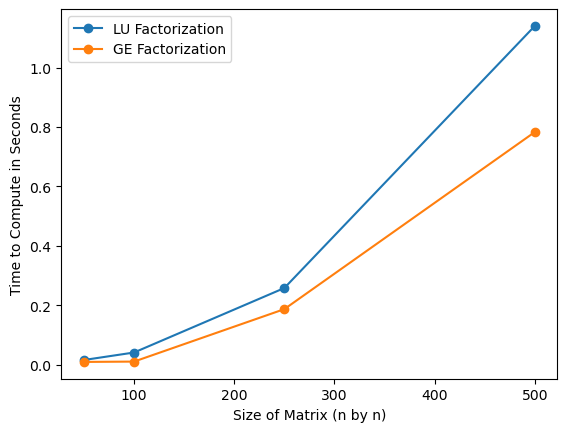

In [115]:
import matplotlib.pyplot as plt

y_axis1 = [total_time1a, total_time2a, total_time3a, total_time4a]
y_axis2 = [total_time1b, total_time2b, total_time3b, total_time4b]

x_axis = [50, 100, 250, 500]

plt.plot(x_axis, y_axis1, marker = 'o')
plt.plot(x_axis, y_axis2, marker = 'o')
plt.legend(['LU Factorization', 'GE Factorization'])
plt.ylabel("Time to Compute in Seconds")
plt.xlabel("Size of Matrix (n by n)")
plt.show()

### Table of Errors by Method, by n

In [116]:
from tabulate import tabulate

table = [['n', 'GE', 'LU'], 
         ['50', residual1b, residual1a], 
         ['100', residual2b, residual2a], 
         ['250', residual3b, residual3a],
         ['500', residual4b, residual4a]]

print(tabulate(table))

---  ------------------  ------------------
n    GE                  LU
50   6.42099832184827    0.6312783040038418
100  10.653541733998619  1.5630335525243462
250  16.314090731320803  2.4037620129700445
500  22.559363605237124  3.313586902166185
---  ------------------  ------------------


###  Errors and Wallclock Time

The errors were consistently smaller using the LU decomposition instead of Gaussian elimination. The time to compute was similar for smaller sized matrices (up to size 100), after n grew large enough LU decomposition began to take significantly more time and was outpacing Gauss for how quickly the time to compute increased. The wallclock time differnce between the mehtod was somewhat expected, due to the nature of LU decomposition requiring the composition of two matrices. More generally:

For Gauss, once the matrix is in this form, back substitution is performed to obtain the solution. This process has a computational complexity of O(n^3), where n is the size of the matrix.
For LU, Once A is decomposed, solving systems of equations with different right-hand sides becomes computationally efficient, typically requiring O(n^2) operations for each system.

Therefore, if you have to solve the system Ax - b = 0 multiple times with different matrices A but the same LU decomposition, the LU decomposition approach can potentially be faster than performing Gaussian elimination for each system independently. By reusing the LU decomposition, you can save computational time by avoiding the need to perform the factorization repeatedly.

However, if the matrix A changes with every system to be solved, (as in this case) then re-factoring the matrix using LU decomposition for each system may offset the benefits.

### Family A^ = R

In [121]:
import numpy as np

# set the value of n
n = 50

# generate matrix A
A = np.random.normal(size = (n, n))

b = np.random.normal(0, 1, size=(n, 1))



# LU Factorization

L, U = lu_factorization(A)

t0 = time.time()

x = solve_lu(L, U, b)

t1 = time.time()
total_time1a = t1 - t0

residual1a = np.linalg.norm(np.dot(A, x) - b)

print('Time to Compute Using n = ', n, 'with LU: ', total_time1a)
print("Residual error: ", residual1a)



# GE Factorization

result = gaussian_elimination(A)

t2 = time.time()

x_back = back_sub(result, b)

t3 = time.time()
total_time1b = t3 - t2

residual1b = np.linalg.norm(np.dot(A, x) - b)

#print('Time to Compute Using n = ', n, 'with GE: ', total_time1b)
#print("Residual error: ", residual1b)

Time to Compute Using n =  50 with LU:  0.01657247543334961
Residual error:  67.31365959855555
Time to Compute Using n =  50 with GE:  0.0036454200744628906
Residual error:  nan


C:\Users\gg\AppData\Local\Temp\ipykernel_6292\1616214449.py:11: RuntimeWarning: divide by zero encountered in divide
  x[i] /= U[i][i]
C:\Users\gg\AppData\Local\Temp\ipykernel_6292\1616214449.py:10: RuntimeWarning: invalid value encountered in multiply
  x[i] -= U[i][j] * x[j]


What I notice is that the residual error for this family A^ = R is much larger than the residual error for the same sized matrices of the family A^ = (5√n)I + R. The time to compute was similar for both cases.

### Academic Integrity

On my personal integrity as a student and member of the UCD community, I have not given, nor received and unauthorized assistance on this assignment.